# Examen apprentissage automatique
    Anass EZZINE
    4A FISA

## 1 - Régression

In [324]:
import numpy as np

In [325]:
data = np.loadtxt("data.csv", delimiter=",")
X = data[:,:4]
Ynote = data[:,4]
Yval = data[:,5]

Pour la **régression Ridge**, la fonction de coût à minimiser sur l'ensemble d'apprentissage est :

$$
J(\mathbf{w}) = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^\top \mathbf{x}_i)^2 + \frac{\alpha}{2} \|\mathbf{w}\|^2
$$

Le paramètre alpha (α) dans la régression Ridge contrôle l'importance de la régularisation.

Si α = 0 : Pas de régularisation cad modèle identique à une régression linéaire classique (risque de surapprentissage).

Si α augmente : Les coefficients du modèle sont réduits, ce qui limite le surapprentissage et améliore la généralisation.

Si α est trop grand : Les coefficients deviennent trop petits cad modèle trop simple

In [326]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Chargement des données
data = np.loadtxt("data.csv", delimiter=",")
X = data[:, :4]
Ynote = data[:, 4]  # Variable cible pour la note
Yval = data[:, 5]   # Variable cible pour la validation (si nécessaire)

# 1. Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, Ynote, test_size=0.3, random_state=42)

# 2. Normalisation MinMax
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Sélection d'alpha par validation croisée 
alphas = np.logspace(-3, 3, 100) 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    mse_values = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        # Séparation fold train/validation
        X_fold_train, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_fold_train, y_val = y_train[train_idx], y_train[val_idx]
        
        # Entraînement et évaluation
        model = Ridge(alpha=alpha).fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_val)
        mse_values.append(mean_squared_error(y_val, y_pred))
    
    mean_mse = np.mean(mse_values)
    if mean_mse < best_mse:
        best_mse = mean_mse
        best_alpha = alpha

print(f"Meilleur alpha optimal: {best_alpha:.5f}")

# 4. Entraînement du modèle final
final_model = Ridge(alpha=best_alpha).fit(X_train_scaled, y_train)

# 5. Évaluation des performances
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'R²': r2_score(y, y_pred),
        'MAE': np.mean(np.abs(y - y_pred))
    }

train_metrics = evaluate_model(final_model, X_train_scaled, y_train)
test_metrics = evaluate_model(final_model, X_test_scaled, y_test)

# Affichage des résultats
print("\nPerformance en apprentissage:")
print(f"- MSE: {train_metrics['MSE']:.4f}")
print(f"- R²: {train_metrics['R²']:.4f}")
print(f"- MAE: {train_metrics['MAE']:.4f}")

print("\nPerformance en généralisation (test):")
print(f"- MSE: {test_metrics['MSE']:.4f}")
print(f"- R²: {test_metrics['R²']:.4f}")
print(f"- MAE: {test_metrics['MAE']:.4f}")

coefficients = final_model.coef_
print("les coefficients :",coefficients)


Meilleur alpha optimal: 0.00100

Performance en apprentissage:
- MSE: 4.0040
- R²: 0.7183
- MAE: 1.6230

Performance en généralisation (test):
- MSE: 4.2995
- R²: 0.6877
- MAE: 1.7139
les coefficients : [  6.71590647 -13.38111341   0.99238499   0.10825372]


**Performance en Apprentissage :**

- **MSE (Mean Squared Error) = 4.0040**  
Cela indique que, en moyenne, l’erreur au carré entre les valeurs prédites et réelles est assez faible. Le modèle a bien appris à prédire les notes des étudiants sur les données d'entraînement.

- **R² = 0.7183**  
Un R² de 0.7183 signifie que **71,83% de la variance des notes** est expliquée par les variables du modèle cad le modèle a une performance décente sur les données d'entraînement et réussit à capturer une partie importante des variations des notes.

- **MAE (Mean Absolute Error) = 1.6230**  
Cette métrique mesure l’erreur absolue moyenne. En moyenne, les prédictions sont à **1.62 points** près de la valeur réelle, ce qui est acceptable dans le cadre d’une régression.

**Performance en Généralisation (Test) :**

- **MSE = 4.2995**  
L'erreur au carré est légèrement plus élevée en test, ce qui montre que le modèle généralise un peu moins bien sur les données invisibles.
- **R² = 0.6877**  
Le modèle explique **68,77% de la variance** des données de test, ce qui est encore assez bon mais légèrement inférieur à la performance en apprentissage (71.83%).

- **MAE = 1.7139**  
L'erreur absolue moyenne est aussi légèrement plus élevée en test, ce qui est encore une indication que le modèle est moins performant sur des données qu'il n'a pas vues pendant l'entraînement. Cela peut être lié à un **surapprentissage** sur l’ensemble d’entraînement.

**Coefficients du modèle :** [ 6.71590647  -13.38111341   0.99238499   0.10825372 ]

**Premier coefficient (6.71590647)** :
- Cela correspond au **(biais)**.
- Ce coefficient représente la **valeur moyenne** de la note lorsque toutes les variables explicatives sont égales à zéro.

**Deuxième coefficient (-13.38111341)** :
- Ce coefficient est **négatif**, ce qui signifie que la **variable associée** (**le nombre d'absences non justifiées**) a une relation **inverse** avec la note finale.

**Troisième coefficient (0.99238499)** :
- Ce coefficient est **positif**, indiquant que cette variable (**le ratio temps de lecture / temps de sommeil**) a un **effet positif** sur la note finale.

**Quatrième coefficient (0.10825372)** :
- Ce coefficient est aussi **positif**, ce qui suggère que **vivre avec un chat** (représenté par une variable binaire 0 ou 1) a un **effet positif modeste** sur la note finale.

**Conclusion :**

- **Les variables les plus prédictives** de la note finale semblent être :
  1. **Le nombre d'absences non justifiées** (coefficient le plus important en valeur absolue et négatif).
  2. **Le ratio temps de lecture / temps de sommeil**, avec un effet positif.

Oui, il y a un intérêt à utiliser la version régularisée de la régression linéaire, surtout si on fait face à un problème de surapprentissage ce qui est notre cas. La régression Ridge permet une meilleure généralisation sur les nouvelles données et réduit la variance du modèle tout en gérant mieux la complexité des données.

# 2 - Classification

In [327]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Précision SVM linéaire: 84.40%


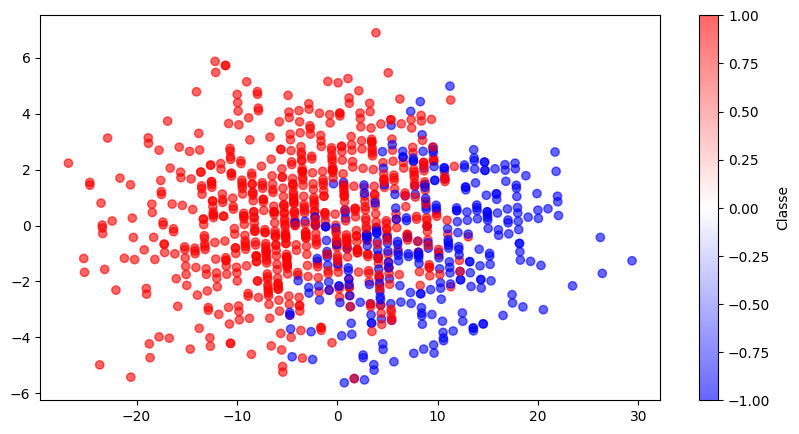

In [328]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=Yval, cmap='bwr', alpha=0.6)
plt.colorbar(label='Classe')

model = LinearSVC(max_iter=10000)
model.fit(X, Yval)
score = model.score(X, Yval)
print(f"Précision SVM linéaire: {score:.2%}")

On peut voir clairement que les données ne sont pas linéairement séparables


In [329]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Préparation des données
X_train, X_test, y_train, y_test = train_test_split(X, Yval, test_size=0.3, random_state=42)

# 2. Recherche des meilleurs hyperparamètres
param_grid = {
    'n_neighbors': range(3, 16),  # Teste K de 3 à 15
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 3. Résultats de l'optimisation
print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleure précision CV: {grid_search.best_score_:.2%}")

# 4. Évaluation finale
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

print("\nPerformance sur l'ensemble de test:")
print(f"Précision: {accuracy_score(y_test, y_pred):.2%}")


Meilleurs paramètres: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Meilleure précision CV: 83.86%

Performance sur l'ensemble de test:
Précision: 79.00%


Écart entre validation croisée (83.86%) et test (79.00%) suggère un léger surapprentissage,     K=13 indique que vos données nécessitent une large zone de décision

    Distance Manhattan performe mieux qu'Euclidienne → données potentiellement redondantes